In [2]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, Dense, Activation, Dropout, MaxPool2D, Flatten, LeakyReLU, MaxPooling2D
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:

train_dir = r'C:\Users\lenovo\Desktop\Session 3\faces\Train'        

# Get the list of images from train_dir
Images = os.listdir(train_dir)

csv_path = r'C:\Users\lenovo\Desktop\Session 3\faces\train.csv'

Labels = pd.read_csv(csv_path)

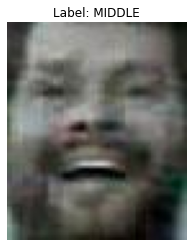

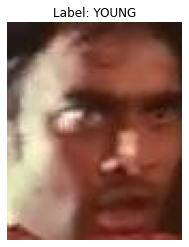

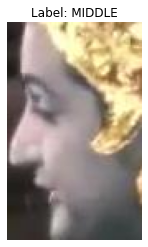

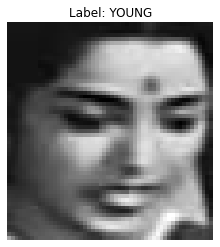

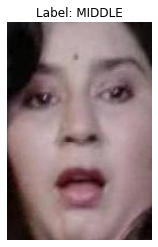

In [5]:
for idx, row in Labels.iterrows():
    
    image_path = os.path.join(train_dir, row["ID"])
    try:
        image = Image.open(image_path)
        plt.imshow(image)
        plt.title(f'Label: {row["Class"]}')
        plt.axis('off')  
        plt.show()
    except FileNotFoundError:
        print(f'File {image_path} not found.')

    if idx == 4:
        break


In [7]:
# محاسبه تعداد فایل‌ها در دایرکتوری
num_files = len(os.listdir(train_dir))

# چاپ تعداد فایل‌ها و تعداد ردیف‌های CSV
print(f'Number of files in train_dir: {num_files}')
print(f'Number of rows in CSV: {len(Labels)}')

Number of files in train_dir: 19906
Number of rows in CSV: 19906


In [8]:

image_format = image.format
print(f'Image Format: {image_format}')


Image Format: JPEG


In [9]:
# Convert image to NumPy array
image_array = np.array(image)
print(f'Image Array Shape: {image_array.shape}')


Image Array Shape: (200, 133, 3)


In [10]:
# pixel value at position (x, y)
x, y = 0, 0
pixel_value = image_array[y, x]
print(f'Pixel value at ({x}, {y}): {pixel_value}')


Pixel value at (0, 0): [32 31 37]


In [11]:

mode = image.mode
print(f'Image Mode: {mode}')


Image Mode: RGB


In [12]:

# Define the correct train_dir
train_dir = r'C:\Users\lenovo\Desktop\Session 3\faces\Train\\'

# Check if the directory exists
if os.path.exists(train_dir):
    # Get the list of images from train_dir
    Images = os.listdir(train_dir)
    print("Images:", Images)
else:
    print(f"The directory {train_dir} does not exist.")

e = 0
for i in range(len(Images)):
    img_path = os.path.join(train_dir, Images[i])
    try:
        img = Image.open(img_path)
        img = img.resize((60, 60))
        img = np.array(img)
    except Exception as ex:
        print(f"Error opening image {img_path}: {ex}")
        e += 1

print(f"Number of errors: {e}")


Images: ['0.jpg', '1.jpg', '100.jpg', '10000.jpg', '10001.jpg', '10004.jpg', '10007.jpg', '10008.jpg', '10009.jpg', '10011.jpg', '10013.jpg', '10015.jpg', '10016.jpg', '10017.jpg', '10018.jpg', '10019.jpg', '1002.jpg', '10021.jpg', '10023.jpg', '10025.jpg', '10026.jpg', '10027.jpg', '10028.jpg', '1003.jpg', '10030.jpg', '10031.jpg', '10034.jpg', '10035.jpg', '10036.jpg', '10038.jpg', '1004.jpg', '10040.jpg', '10041.jpg', '10043.jpg', '10045.jpg', '10046.jpg', '10047.jpg', '10048.jpg', '1005.jpg', '10050.jpg', '10051.jpg', '10053.jpg', '10055.jpg', '10056.jpg', '10057.jpg', '10058.jpg', '10059.jpg', '1006.jpg', '10061.jpg', '10062.jpg', '10063.jpg', '10065.jpg', '10067.jpg', '10068.jpg', '10069.jpg', '1007.jpg', '10070.jpg', '10071.jpg', '10073.jpg', '10076.jpg', '10078.jpg', '10079.jpg', '1008.jpg', '10080.jpg', '10081.jpg', '10082.jpg', '10084.jpg', '10085.jpg', '10086.jpg', '10087.jpg', '10088.jpg', '1009.jpg', '10091.jpg', '10092.jpg', '10093.jpg', '10095.jpg', '10096.jpg', '10097.j

Number of errors: 0


In [13]:
data=[]
label=[]
e=0
for i in range(0,111):   ### len(Images)  and 100 >     ## to Hanggggggg  Laptop
  img=Image.open(train_dir+Images[i])
  img=img.resize((60,60))
  img=np.array(img)
  data.append(img)
  try:
    if list(Labels[Labels['ID']==Images[i]]['Class'].values)[0]=='YOUNG':
      label.append(0)
    elif list(Labels[Labels['ID']==Images[i]]['Class'].values)[0]=='MIDDLE':
      label.append(1)
    else:
      label.append(2)
  except:
    label.append(-1)
print('Finish')

Finish


In [14]:
data=np.asarray(data)
label=np.asarray(label)
label=keras.utils.to_categorical(label,num_classes=3)

print(data.shape,label.shape)

(111, 60, 60, 3) (111, 3)


In [16]:
X_train,X_test,y_train,y_test = train_test_split(data, label, test_size=0.2, random_state=40)

In [17]:
#Scaling images to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
model = Sequential()
model.add(Conv2D(128, [5,5], strides = [2,2], padding = 'SAME', input_shape=(60,60,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [5,5], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(256, [1,1], padding = 'same'))
model.add(Conv2D(256, [3,3], padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(padding = 'same'))

model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same',activation = 'relu'))
model.add(Conv2D(512, [1,1], padding = 'same'))
model.add(Conv2D(512, [3,3], padding = 'same', activation = 'relu'))
model.add(MaxPool2D(padding = 'same'))
model.add(Flatten())

model.add(Dense(4096, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

opt = optimizers.Adam(learning_rate=0.001)

model.compile(optimizer =  opt , loss = 'categorical_crossentropy', metrics = ['acc'])

In [30]:
# Show a summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 128)       9728      
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 256)       819456    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 15, 15, 256)       0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                  

In [19]:
# Model training
history = model.fit(X_train, y_train, batch_size=80, epochs=7, validation_data=(X_test, y_test))


Epoch 1/7
2/2 [==============================] - 6s 1s/step - loss: 1.2380 - acc: 0.3864 - val_loss: 1.0411 - val_acc: 0.3478
Epoch 2/7
2/2 [==============================] - 3s 549ms/step - loss: 1.0074 - acc: 0.3636 - val_loss: 1.8336 - val_acc: 0.3478
Epoch 3/7
2/2 [==============================] - 3s 704ms/step - loss: 1.6836 - acc: 0.3636 - val_loss: 1.2960 - val_acc: 0.4783
Epoch 4/7
2/2 [==============================] - 3s 683ms/step - loss: 1.2467 - acc: 0.4545 - val_loss: 2.0692 - val_acc: 0.4783
Epoch 5/7
2/2 [==============================] - 2s 496ms/step - loss: 1.8360 - acc: 0.4318 - val_loss: 1.1006 - val_acc: 0.3478
Epoch 6/7
2/2 [==============================] - 2s 540ms/step - loss: 1.1047 - acc: 0.3977 - val_loss: 1.0641 - val_acc: 0.4783
Epoch 7/7
2/2 [==============================] - 3s 555ms/step - loss: 1.0277 - acc: 0.4886 - val_loss: 1.0321 - val_acc: 0.4783


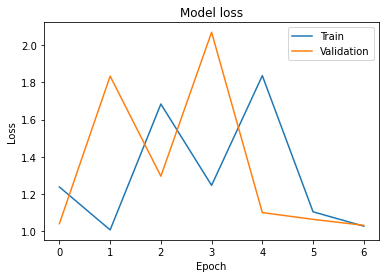

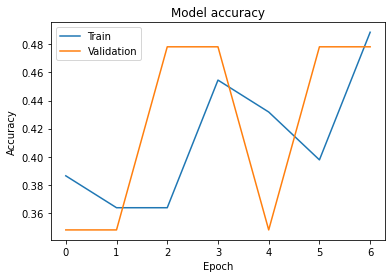

In [23]:
# Plot training & validation loss values
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# Plot training & validation accuracy values
def plot_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the loss and accuracy
plot_loss(history)
plot_accuracy(history)


In [32]:
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])


1/1 [==============================] - 0s 281ms/step


1/1 [==============================] - 0s 275ms/step


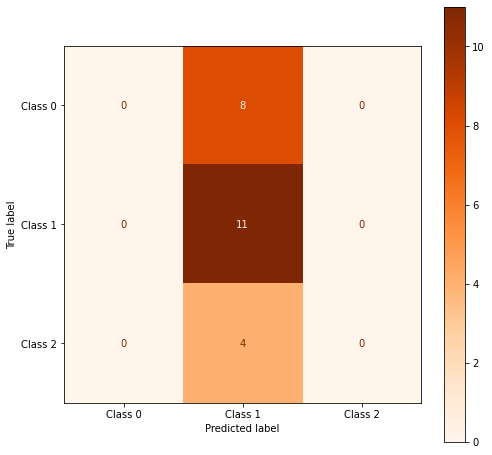

In [41]:
pred_probs = model.predict(X_test)
pred_labels = np.argmax(pred_probs, axis=1)

#  One-Hot Encoded 
true_labels = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

num_classes = len(np.unique(true_labels))

labels = [f'Class {i}' for i in range(num_classes)]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 8))

disp.plot(ax=ax, cmap='Oranges', values_format='d')  
plt.show()


In [43]:
 
report = classification_report(true_labels, pred_labels, target_names=labels)
print(report)


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         8
     Class 1       0.48      1.00      0.65        11
     Class 2       0.00      0.00      0.00         4

    accuracy                           0.48        23
   macro avg       0.16      0.33      0.22        23
weighted avg       0.23      0.48      0.31        23



D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
